## Simuler Hawkes processes H

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize
from hawkes_process import thinning_hawkes
from scipy.stats import norm
from estimate_exac import estimate_hawkes_params, hawkes_test, hawkes_test2,hawkes_test3

L'intensite conditionelle $\lambda^*(t)= \mu + \int_{0}^{t}h(t-s)dHs$

Cas exponentiel $h(t)=\alpha e^{-\beta t}$ 
Alors $\lambda^*(t)= \mu + \int_{0}^{t}\alpha  e^{-\beta(t-s)}dHs = \mu + \sum_{T_i<t}\alpha e^{-\beta (t-T_i)}$

If faut que $\frac{\alpha}{\beta}<1$ pour que $\|h\|_1<1$

In [14]:
mu=0.4
alpha=0.7
beta=1.0
T=1000
me = thinning_hawkes(mu, alpha, beta,T, kernel_type='exponential')
e = me.simulate()
L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(e, T)
print( mu_hat, alpha_hat, beta_hat, variance_hat )


0.4277573949060414 0.6615435939312507 0.9867296163224673 11.959715356195254


In [15]:
time_threshold_1 = T / 3
time_threshold_2 = 2 * T / 3
idx1 = 0
while idx1 < len(e) and e[idx1] < time_threshold_1:
    idx1 += 1
    idx2 = idx1
while idx2 < len(e) and e[idx2] < time_threshold_2:
    idx2 += 1
list1e = e[0:idx1]
list2e = e[idx1:idx2]
list3e = np.array(e[idx2:])-2/3*T

L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3e, T/3)

print( mu_hat, alpha_hat, beta_hat, variance_hat )
hawkes_test3(len(list1e), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)

0.42632568817211375 0.6286523649308446 0.9157538740616037 13.874075028514877


0

 Gaussian kernel
$
\lambda(u)
= \alpha \exp\!\left(-\frac{u^{2}}{2\beta^{2}}\right)\,\mathbf{1}_{\{u \ge 0\}}.
$

Conditional intensity
$
\lambda^{\ast}(t)
= \mu \;+\; \sum_{T_i < t} \lambda(t - T_i)
= \mu \;+\; \alpha \sum_{T_i < t}
\exp\!\left(-\frac{(t - T_i)^{2}}{2\beta^{2}}\right).
$

In [4]:
mu=0.4
alpha=0.7
beta=1.0
T=1800
me = thinning_hawkes(mu, alpha, beta, T, kernel_type='gaussien')
e = me.simulate()
time_threshold_1 = T / 3
time_threshold_2 = 2 * T / 3
idx1 = 0
while idx1 < len(e) and e[idx1] < time_threshold_1:
    idx1 += 1
    idx2 = idx1
while idx2 < len(e) and e[idx2] < time_threshold_2:
    idx2 += 1
list1e = e[0:idx1]
list2e = e[idx1:idx2]
list3e = np.array(e[idx2:])-2/3*T

L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3e, T/3)
hawkes_test3(len(list1e), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)
print( mu_hat, alpha_hat, beta_hat, variance_hat )

0.4474737002278917 1.0202732858504278 1.17824291691613 188.68159230821024


$$
\lambda(t) = \mu + \alpha\,N_{\text{active}}(t)
$$
with
$$
N_{\text{active}}(t) = \#\left\{\, k \;:\; 0 \le t - t_k < \beta \,\right\}.
$$


In [2]:
mu=0.4
alpha=0.7
beta=1.0
T=1800
me = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
e = me.simulate()
time_threshold_1 = T / 3
time_threshold_2 = 2 * T / 3
idx1 = 0
while idx1 < len(e) and e[idx1] < time_threshold_1:
    idx1 += 1
    idx2 = idx1
while idx2 < len(e) and e[idx2] < time_threshold_2:
    idx2 += 1
list1e = e[0:idx1]
list2e = e[idx1:idx2]
list3e = np.array(e[idx2:])-2/3*T

L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list1e, T/3)
hawkes_test3(len(list3e), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)
print( mu_hat, alpha_hat, beta_hat, variance_hat )

0.9433098986259842 0.6723833700622303 0.9539372517948121 36.848545910412454


In [3]:
mu=0.4
alpha=0.7
beta=1.0
T=1800
me = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
e = me.simulate()
time_threshold_1 = T / 3
time_threshold_2 = 2 * T / 3
idx1 = 0
while idx1 < len(e) and e[idx1] < time_threshold_1:
    idx1 += 1
    idx2 = idx1
while idx2 < len(e) and e[idx2] < time_threshold_2:
    idx2 += 1
list1e = e[0:idx1]
list2e = e[idx1:idx2]
list3e = np.array(e[idx2:])-2/3*T

L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3e, T/3)
hawkes_test3(len(list1e), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)
print( mu_hat, alpha_hat, beta_hat, variance_hat )

0.886985480381476 0.7524001564826346 1.042249992881375 41.27562053243501


Teste 1: Test for a Hawkes process with parameter fixed 

$\mathcal{H}_0$: $H_t$ is a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

$\mathcal{H}_1$: $H_t$ is not a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

In [18]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
l1=0


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1+=1


In [19]:
print(l1/1000)

0.052


In [21]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
l1=0


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1+=1

In [22]:
print(l1/1000)

1.0


Teste 2

In [23]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l2=0
Realite = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()

    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    
    if hawkes_test2(T,Realite, X,variance_hat, alpha_level=0.05)==1:
        l2+=1

In [25]:
print(l2/1000)

0.059


In [26]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
l2=0


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l2+=1

In [27]:
print(l2/1000)

1.0


Teste 3

In [28]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l+=1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.079


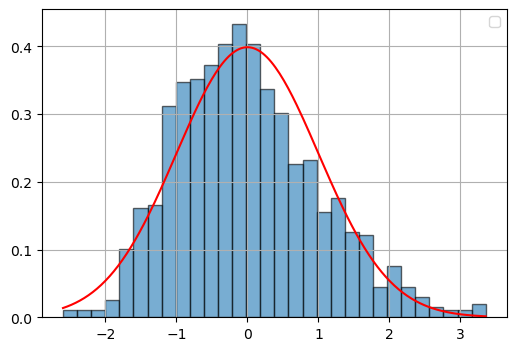

In [29]:
print(l/1000)
Tx=T/3

normalized3 =  ((np.array(Expo_events))/Tx -np.array(Espe_hat)) * np.sqrt(Tx)/np.sqrt(np.array(Var2)+mu / (1 - alpha/beta)**3)
plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    normalized3,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',

)

x = np.linspace(bins.min(), bins.max(), 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-')

plt.legend()
plt.grid(True)
plt.show()

In [31]:
T = 600
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l+=1

In [32]:
print(l)

55
